In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

## Trump data

In [3]:
# Using twitterscrape: 'twitterscraper from:RealDonaldTrump --output=trump.json'
old_trump = pd.read_json('data/old-trump.json')
print(old_trump.shape)
print(old_trump.columns)

(38397, 21)
Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url'],
      dtype='object')


In [4]:
# Using twint: twint -u realDonaldTrump -o trump.json --json
trump = pd.read_json('data/trump.json', lines=True)

In [5]:
print(trump.shape)
print(trump.columns)

(40301, 31)
Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')


In [9]:
trump['tweet'].head()

0                           pic.twitter.com/FJ8gMdh5bX
1                                 READ THE TRANSCRIPT!
2                                      NEVER TRUMPERS!
3    ....any laws or did anything wrong, and they h...
4    ...the most powerful tool the legislative bran...
Name: tweet, dtype: object

In [13]:
trump['created_at'].head()

0   2019-11-13 16:50:37
1   2019-11-13 13:30:55
2   2019-11-13 13:30:31
3   2019-11-13 13:18:10
4   2019-11-13 13:18:08
Name: created_at, dtype: datetime64[ns]

In [8]:
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40301 entries, 0 to 40300
Data columns (total 31 columns):
id                 40301 non-null int64
conversation_id    40301 non-null int64
created_at         40301 non-null datetime64[ns]
date               40301 non-null datetime64[ns]
time               40301 non-null object
timezone           40301 non-null object
user_id            40301 non-null int64
username           40301 non-null object
name               40301 non-null object
place              40301 non-null object
tweet              40301 non-null object
mentions           40301 non-null object
urls               40301 non-null object
photos             40301 non-null object
replies_count      40301 non-null int64
retweets_count     40301 non-null int64
likes_count        40301 non-null int64
hashtags           40301 non-null object
cashtags           40301 non-null object
link               40301 non-null object
retweet            40301 non-null bool
quote_url          403

## Bolsonaro data 

In [ ]:
# Source: 'twint -u jairbolsonaro -o bolsonaro.json --json'
bolsonaro = pd.read_json('data/bolsonaro.json')


In [ ]:
bolsonaro.shape

## Functions

In [11]:
#Make text for twitter lowercase to search for matching expressions
trump['text_lower'] = trump.tweet.str.lower()

#### Count all fake news expressions

In [14]:

def fake_news_mentions(data, match = []):
    #find patterns
    for i in match:
        data[i] = data['text_lower'].str.contains(i)

    # Convert True/False values to 0/1
    data[match] = data[match].astype('int32')
        
    # Create column with total fake_news
    data['fake_news_mention'] = data[match].sum(axis=1)
    print('Total fake_news labels: {}\n'.format(data.fake_news_mention.sum()))
    
    # Print value counts for expressions
    for i in match:
        print('{}\n'.format(data[i].value_counts()))


#### Aggregate tweets by day, vis & basic summary

In [20]:

def aggregate_tweets_day(data, title_vis):
    
    global fake_news
    
    d = {'timestamp':'tweets_per_day'}
    new_df = data.groupby(data.created_at.dt.date).\
    agg({'created_at':'count', 'fake_news_mention':'sum'}).rename(columns=d)
    
    fake_news = new_df[new_df['fake_news_mention'] > 0]
    fake_news.plot(style='o', alpha = 0.5)
    
    plt.title(title_vis)
    
    print('- Total tweets mentioning fake news expressions between {}-{}: {}'.\
          format(data.date.min(), data.date.max(),fake_news.fake_news_mention.sum()))
    print('- First tweet: {}'.format(fake_news.index.min()))
    print('- Last tweet: {}'.format(fake_news.index.max()))
    
    res = (pd.Series(fake_news.index[1:]) - pd.Series(fake_news.index[:-1])).value_counts()
    print('- Average frequency: {0:.2f} days'.format(res.mean()))
    
    

## Trump

In [21]:
trump_expressions = ['fake news', 'false news', 'fake media', 'falsenews', 'fakemedia', 'enemy of the people']
fake_news_mentions(trump, trump_expressions)

Total fake_news labels: 592

0    39763
1      538
Name: fake news, dtype: int64

0    40300
1        1
Name: false news, dtype: int64

0    40284
1       17
Name: fake media, dtype: int64

0    40301
Name: falsenews, dtype: int64

0    40301
Name: fakemedia, dtype: int64

0    40265
1       36
Name: enemy of the people, dtype: int64



- Total tweets mentioning fake news expressions between 2009-05-04 00:00:00-2019-11-13 00:00:00: 592
- First tweet: 2016-11-16
- Last tweet: 2019-11-11
- Average frequency: 19.95 days


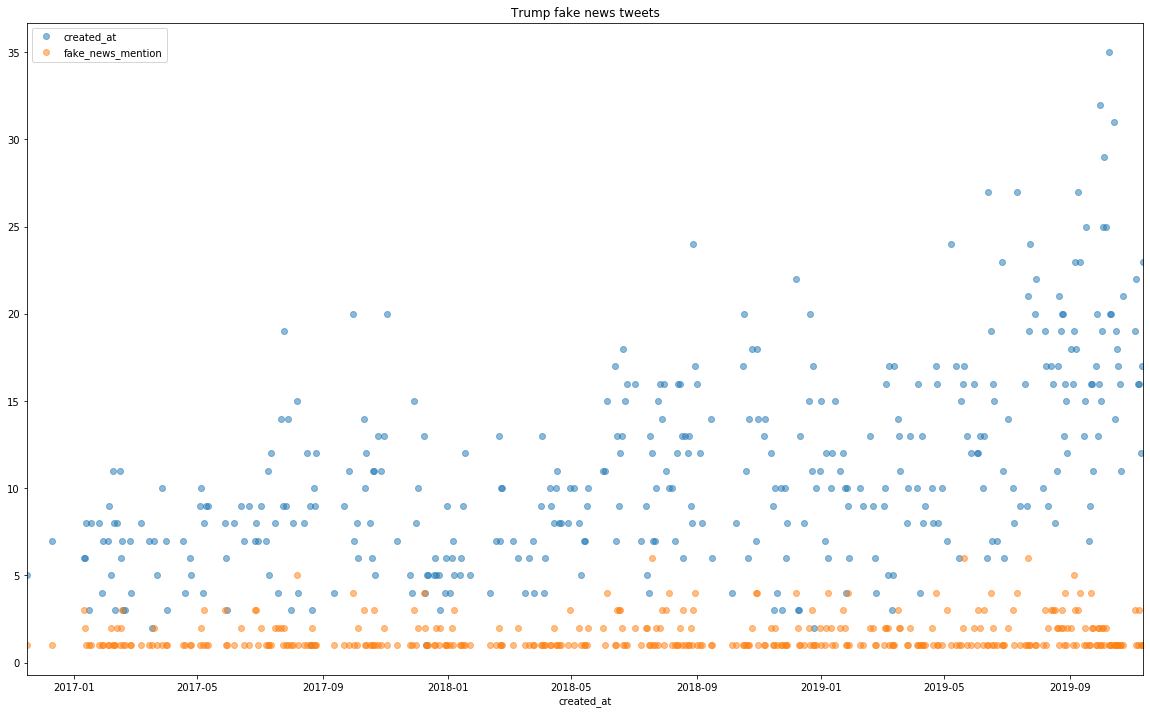

In [22]:
aggregate_tweets_day(trump, "Trump fake news tweets")